![example](images/director_shot.jpeg)

# EDA of the IMDB Movies Database

**Authors:** Melody Bass
***

## Overview

The focus of this project is to analyze determining factors in what makes a movie successful.  We will define success as a film being profitable and well received by critics and users.  The original data source comes from Kaggle and can be found [here](https://www.kaggle.com/soumyasacharya/imdb-movies-dataset). The dataset contains information on over 75,000 movies from IMDB. We will first focus on investigating the dataset and cleaning and wrangling the data into analysis format. The next sections contain questions and answers pertaining to the properties and characteristics that have made films successful over the past 20 years and the modeled data as follows:
* Movie length
* Movie release month
* Production budget
* Genres
* Directors
* Actors

Finally, I will evaluate my results and make recommendations to Microsoft's new movie studio about what types of movies will be successful in today's atmosphere.

## Business Problem

Microsoft wants to get into the movie business and are interested in starting a new movie studio.  I have been tasked with making recommendations about what types of films to create.

***
Questions we will answer:

1- What characteristics are associated with the most successful movies?
* What movie runtime generates the most profits?
* What movie runtime is the highest rated by users and critics?
* What months are the most profitable movies released?
* Do higher production budgets lead to higher profits?
* Do higher production budgets lead to higher user and critic reviews?
* Do higher production budgets lead to higher ROI?

2- What genres are most profitable and highly rated overall and over time?
* What is the most profitable genre?
* What genre is the highest rated by users and critics?
* What is our top overall genres?

3- Who are the people who make the most successful films?
* What director generates the highest average profit?
* What directors have the highest user and critic ratings?
* What directors have the highest average ROI?
* What popular actors make the most profitable movies?
* What popular actors have the highest user and critic reviews?
* What popular actors have the highest average ROI?
***

## Data Understanding

The dataset used for this analysis can be found on [Kaggle](https://www.kaggle.com/soumyasacharya/imdb-movies-dataset).  It is a compiled dataset containing information about 75,000 movies from IMDB.  I will only use movies from the dataset that contain gross income, production budget, user and critic ratings, and were released in the United States from the year 2000 - present.  Let's get started on investigating the dataset.


In [121]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [122]:
# import movies df

df = pd.read_csv('data/zippeddata/all_df.csv')

df.head()

/Users/melodybass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
0,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,32,den sorte drøm
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,18,cleopatra
2,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,29,l'inferno
3,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,36,"from the manger to the cross; or, jesus of naz..."
4,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,6.8,753,NaN,NaN,NaN,NaN,12.0,9.0,22,madame dubarry


In [123]:
df.shape

(74889, 24)

There is a total of 74889 rows and 24 columns in the dataset.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  object 
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74830 non-null  object 
 8   language               74171 non-null  object 
 9   director               74823 non-null  object 
 10  writer                 73584 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74837 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

In [125]:
df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     59
language                   718
director                    66
writer                    1305
production_company        3744
actors                      52
description                  0
avg_vote                     0
votes                        0
budget                   54078
usa_gross_income         61331
worlwide_gross_income    47971
metascore                63211
reviews_from_users        6047
reviews_from_critics      9708
description_#words           0
movie_title                  0
dtype: int64

In [126]:
df.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,description_#words
count,74889.000000,74889.000000,7.488900e+04,11678.000000,68842.000000,65181.000000,74889.000000
mean,100.352522,5.900541,9.730489e+03,55.712023,46.574853,27.658566,29.717956
std,22.357984,1.229920,5.473764e+04,17.763344,180.482569,58.829668,7.226405
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,16.000000
25%,88.000000,5.200000,2.100000e+02,43.000000,4.000000,3.000000,24.000000
50%,96.000000,6.100000,5.000000e+02,56.000000,9.000000,8.000000,31.000000
75%,108.000000,6.800000,1.789000e+03,69.000000,27.000000,24.000000,35.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,79.000000


In [127]:
sum(df.duplicated())

0

In [128]:
df.nunique()

imdb_title_id            74889
title                    71907
original_title           70906
year                       151
date_published           20790
genre                     1213
duration                   258
country                   4483
language                  3994
director                 31925
writer                   59381
production_company       29309
actors                   74806
description              74821
avg_vote                    89
votes                    13733
budget                    4217
usa_gross_income         13171
worlwide_gross_income    26446
metascore                   99
reviews_from_users        1169
reviews_from_critics       578
description_#words          63
movie_title              70868
dtype: int64

In [129]:
sorted_df = df.sort_values('date_published')
sorted_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
34152,tt0266688,Karadjordje,Karadjordje,1911,1911,"Drama, War",80,Serbia,Serbian,Ilija Stanojevic-Cica,...,6.2,162,NaN,NaN,NaN,NaN,5.0,NaN,36,karadjordje
2,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,29,l'inferno
0,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,32,den sorte drøm
31240,tt0194248,Pinocchio,Pinocchio,1911,1911-12-01,Fantasy,50,Italy,NaN,Giulio Antamoro,...,5.7,102,NaN,NaN,NaN,NaN,1.0,NaN,34,pinocchio
31136,tt0191323,Oborona Sevastopolya,Oborona Sevastopolya,1911,1911-12-09,"History, War",100,Russia,NaN,"Vasili Goncharov, Aleksandr Khanzhonkov",...,6.0,144,NaN,NaN,NaN,NaN,NaN,NaN,30,oborona sevastopolya


In [130]:
sorted_df = df.sort_values('date_published')
sorted_df.tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
67275,tt5278886,The Terrible Two,The Terrible Two,2018,2021-04-02,"Horror, Thriller",84,USA,English,Billy Lewis,...,2.3,310,$ 35000,NaN,NaN,NaN,23.0,12.0,34,the terrible two
72406,tt7715192,Winterskin,Winterskin,2018,2021-04-16,"Action, Fantasy, Horror",84,UK,English,Charlie Steeds,...,3.7,220,NaN,NaN,NaN,NaN,14.0,12.0,38,winterskin
71363,tt7134296,Shadows in Mind,Shadows in Mind,2019,2021-04-30,Thriller,92,USA,English,Mark Schwab,...,5.3,254,NaN,NaN,NaN,NaN,5.0,31.0,29,shadows in mind
73846,tt8764144,A Wakefield Project,A Wakefield Project,2019,2021-05-07,"Horror, Sci-Fi, Thriller",88,"Canada, USA",English,L.A. Lopes,...,2.4,266,NaN,NaN,NaN,NaN,12.0,7.0,16,a wakefield project
73144,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0,33,bad education


There is a total of 74889 rows and 24 columns containing information about movies released from 1911 - 2021.  The budget and worldwide gross income columns have thousands of null values.  I will drop rows that do not contain null values.  Let's move on to cleaning.

## Data Preparation and Cleaning

In this section, I will clean the dataset by removing unused columns and trim the dataset of null values and irrelevant data to the questions that I want to answer.  I will only use movies from the dataset that contain gross income, production budget, user and critic ratings, and were released in the United States from the year 2000 - present. I will calculate profit in millions of dollars and ROI to use as some of my parameters to measure movie success.  The variables that will be used to evaluate a movie's success will be profit ($M), audience reviews, critic reviews, and in some cases, ROI (%).  

### Remove data from outside USA

In [131]:
# Drop rows where movie was not made in USA, to avoid currency conversion issues
df = df[df.country == 'USA']

In [132]:
# Drop rows that do not have budget values in US$

drop_names = df[(df['budget'] == 'CAD 6500000') | (df['budget'] == 'AUD 1000') | 
             (df['budget'] == 'EUR 2000')].index

df.drop(drop_names, inplace=True)    
    
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,18,cleopatra
3,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,36,"from the manger to the cross; or, jesus of naz..."
10,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,...,5.8,187,NaN,NaN,NaN,NaN,6.0,NaN,26,"home, sweet home"
12,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,...,6.0,552,$ 5700,NaN,NaN,NaN,14.0,11.0,28,traffic in souls
14,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914,1914-08-24,"Crime, Drama, Horror",78,USA,English,D.W. Griffith,...,6.4,1105,NaN,NaN,NaN,NaN,14.0,11.0,16,the avenging conscience: or 'thou shalt not kill'


### Drop unused columns

In [133]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'description_#words',
       'movie_title'],
      dtype='object')

In [134]:
#Drop columns that will not be used
df.drop(['imdb_title_id', 'original_title', 'year', 'language', 'country', 'production_company', 
         'description', 'description_#words', 'movie_title', 'metascore', 'usa_gross_income'],
        axis=1, inplace=True)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
1,Cleopatra,1912-11-13,"Drama, History",100,Charles L. Gaskill,Victorien Sardou,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446,$ 45000,NaN,25.0,3.0
3,"From the Manger to the Cross; or, Jesus of Naz...",1913,"Biography, Drama",60,Sidney Olcott,Gene Gauntier,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,484,NaN,NaN,13.0,5.0
10,Amore di madre,1914-05-17,Drama,55,D.W. Griffith,"D.W. Griffith, H.E. Aitken","Henry B. Walthall, Josephine Crowell, Lillian ...",5.8,187,NaN,NaN,6.0,NaN
12,Traffic in Souls,1913-11-24,"Crime, Drama",88,George Loane Tucker,NaN,"Jane Gail, Ethel Grandin, William H. Turner, M...",6.0,552,$ 5700,NaN,14.0,11.0
14,The Avenging Conscience: or 'Thou Shalt Not Kill',1914-08-24,"Crime, Drama, Horror",78,D.W. Griffith,"Edgar Allan Poe, D.W. Griffith","Henry B. Walthall, Spottiswoode Aitken, Blanch...",6.4,1105,NaN,NaN,14.0,11.0


### Drop rows with null values

There are 25,232 movies in the dataset, but several null values.  I will drop records that do not have values.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25232 entries, 1 to 74875
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  25232 non-null  object 
 1   date_published         25232 non-null  object 
 2   genre                  25232 non-null  object 
 3   duration               25232 non-null  int64  
 4   director               25207 non-null  object 
 5   writer                 25065 non-null  object 
 6   actors                 25210 non-null  object 
 7   avg_vote               25232 non-null  float64
 8   votes                  25232 non-null  int64  
 9   budget                 9313 non-null   object 
 10  worlwide_gross_income  6821 non-null   object 
 11  reviews_from_users     24979 non-null  float64
 12  reviews_from_critics   23589 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 2.7+ MB


In [136]:
# Drop all of our null values from dataset
df.dropna(inplace=True)

In [137]:
# Check to see if it worked
df.isnull().sum().any()

False

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161 entries, 201 to 74780
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  4161 non-null   object 
 1   date_published         4161 non-null   object 
 2   genre                  4161 non-null   object 
 3   duration               4161 non-null   int64  
 4   director               4161 non-null   object 
 5   writer                 4161 non-null   object 
 6   actors                 4161 non-null   object 
 7   avg_vote               4161 non-null   float64
 8   votes                  4161 non-null   int64  
 9   budget                 4161 non-null   object 
 10  worlwide_gross_income  4161 non-null   object 
 11  reviews_from_users     4161 non-null   float64
 12  reviews_from_critics   4161 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 455.1+ KB


### Create columns for profit and ROI

In [139]:
# Converting currency to integers for analysis
df['budget'] = df['budget'].replace({'\$': ''}, regex=True).astype(int)
df['worlwide_gross_income'] = df['worlwide_gross_income'].replace({'\$': ''}, regex=True).astype(int)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000,9183673,45.0,16.0
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000,11233,37.0,24.0
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,200000,121107,250.0,186.0
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,217000,4841,109.0,53.0
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2000000,746,95.0,92.0


### Convert budget and gross income to Millions of dollars

In [140]:
df['budget'] = df['budget'] / 1000000
df['worlwide_gross_income'] = df['worlwide_gross_income'] / 1000000
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,0.800,9.183673,45.0,16.0
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,0.351,0.011233,37.0,24.0
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,0.200,0.121107,250.0,186.0
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,0.217,0.004841,109.0,53.0
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2.000,0.000746,95.0,92.0


In [141]:
# Add a column for profit
df['profit'] = (df['worlwide_gross_income'] - df['budget'])
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,0.800,9.183673,45.0,16.0,8.383673
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,0.351,0.011233,37.0,24.0,-0.339767
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,0.200,0.121107,250.0,186.0,-0.078893
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,0.217,0.004841,109.0,53.0,-0.212159
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2.000,0.000746,95.0,92.0,-1.999254


In [142]:
# Add a column for ROI
df['roi'] = ((df['profit'] / df['budget']) * 100)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,0.800,9.183673,45.0,16.0,8.383673,1047.959125
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,0.351,0.011233,37.0,24.0,-0.339767,-96.799715
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,0.200,0.121107,250.0,186.0,-0.078893,-39.446500
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,0.217,0.004841,109.0,53.0,-0.212159,-97.769124
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2.000,0.000746,95.0,92.0,-1.999254,-99.962700


In [143]:
#Sort df by most profit
df = df.sort_values(by='profit', ascending=False)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321.0,2048.359754,4273.0,611.0,1727.359754,538.118303
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150.0,1670.401444,1537.0,698.0,1520.401444,1013.600963
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150.0,1450.026933,1302.0,275.0,1300.026933,866.684622


### Change release date to datetime format and extract the month and year into new columns

In [144]:
# Change the date_published to datetime

df.date_published = pd.to_datetime(df['date_published'])

# Extracting the month and year of release
df['release_month'] = df['date_published'].dt.month
df['release_year'] = df['date_published'].dt.year
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321.0,2048.359754,4273.0,611.0,1727.359754,538.118303,4,2018
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150.0,1670.401444,1537.0,698.0,1520.401444,1013.600963,6,2015
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150.0,1450.026933,1302.0,275.0,1300.026933,866.684622,11,2019


In [145]:
# Check to see if it worked
df['release_month'].value_counts()

4     419
9     412
3     404
10    400
8     388
11    343
1     324
6     315
5     311
2     305
12    282
7     258
Name: release_month, dtype: int64

### Keep movies released from the year 2000 to present for analysis.

In [146]:
# Remove movies released before the year 2000 from our dataset
df = df.loc[(df['release_year'] >= 2000)]
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321.0,2048.359754,4273.0,611.0,1727.359754,538.118303,4,2018
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150.0,1670.401444,1537.0,698.0,1520.401444,1013.600963,6,2015
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150.0,1450.026933,1302.0,275.0,1300.026933,866.684622,11,2019


In [147]:
# Check to see that it worked
df['release_year'].value_counts()

2014    155
2010    152
2012    148
2008    142
2011    140
2006    137
2013    135
2007    134
2015    127
2009    125
2005    120
2000    115
2017    109
2004    103
2002    103
2016    102
2003    102
2001     96
2018     87
2019     68
2020     27
Name: release_year, dtype: int64

### Confirm changes and save the cleaned dataset

In [148]:
# Final number of movies after cleaning
rows, col = df.shape
print('After cleaning, we now have only {} rows of movies and {} columns.'.format(rows, col))

After cleaning, we now have only 2427 rows of movies and 17 columns.


In [149]:
# Save the cleaned dataset
df.to_csv('./data/imdb-movies-cleaned.csv', index=False)

## Data Modeling
Now the dataframe is clean and we are ready to explore and analyze the dataset of 2427 movies with 17 rows of information.  The model used for processing and analyzing the dataset was descriptive analysis. Movie data was used from the last 21 years to give us a good representation of what is doing well now and over time.  Movies were only included in the dataset if they were released in the United States to avoid currency conversion errors.  Financial data used to calculated statistics has not been adjusted for inflation.

To determine a movie's success, I not only wanted use gross income and profit, but also take into account user and critic reviews as a secondary measure.  The movie length most likely to succeed was determined by finding a range of movie length times containing the maximum average profit, user and critic ratings runtime.  The best months to release movies was calculated by comparing average profit generated vs month of release.  Correlation coefficients were calculated on production budget's effect on profit, ROI, user and critic ratings.

The top overall genres to create today were determined by compiling movies by genre and comparing to the average profits generated, user ratings, and critic ratings.  I took a closer look at the top 5 genres of these categories and compared each genre to the compiled genre profit mean and noted the overall effect outliers have on the dataset.

To measure a director's success in making movies, the dataset was grouped by director and compared against the mean of profit, user ratings, critic ratings, and ROI.  I only wanted to include directors who are consistently successful, so directors had to meet of criteria of directing more than 5 films.  The actors were analyzed and evaluated in the same fashion as directors, except they had to meet a criteria of appearing in more than 10 films.  



### What movie runtime generates the most profits?

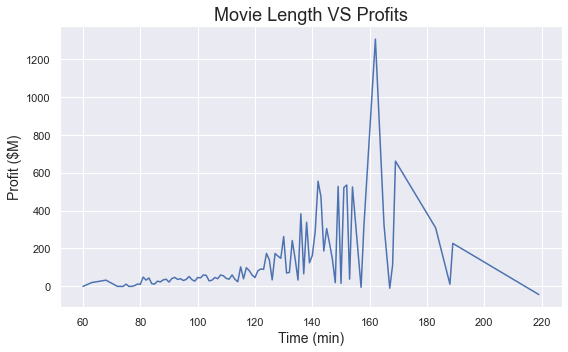

Movie length with the highest profits generated is  162 minutes.


In [150]:
# Movie length that is most profitable
pro_mean = df.groupby('duration').profit.mean()
# Plot
fig = plt.figure(figsize = (8, 5))
sns.lineplot(data = pro_mean, sort = False)
sns.set_style(style="darkgrid") # setting the style of graph
# Title
plt.xlabel("Time (min)", fontsize=14)
plt.title("Movie Length VS Profits", fontsize=18)
plt.ylabel("Profit ($M)", fontsize=14)
plt.tight_layout()
plt.show()

# Max_value
max_run= pro_mean.idxmax()

#Save file
fig.savefig('./images/length-profit.png')

print('Movie length with the highest profits generated is ', max_run, 'minutes.')

### What movie runtime is the highest rated by users?

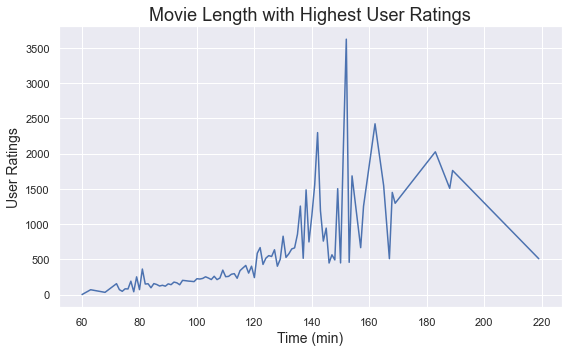

Movie length with the highest user ratings is  152 minutes.


In [151]:
# Movie length most liked by audience
dur_mean = df.groupby('duration').reviews_from_users.mean()
# Plot
fig = plt.figure(figsize = (8, 5))
sns.lineplot(data = dur_mean, sort = False)
sns.set_style(style="darkgrid") # setting the style of graph
# Title
plt.xlabel("Time (min)", fontsize=14)
plt.title("Movie Length with Highest User Ratings", fontsize=18)
plt.ylabel("User Ratings", fontsize=14)
plt.tight_layout()
plt.show()

# Max_value
max_run= dur_mean.idxmax()

#Save file
fig.savefig('./images/length_user_ratings.png')

print('Movie length with the highest user ratings is ', max_run, 'minutes.')

### What movie runtime is the highest rated by critics?

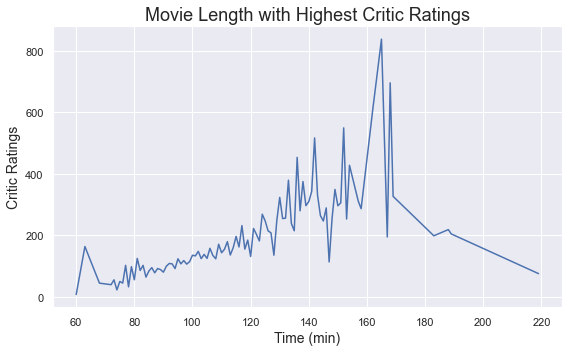

Movie length with the highest critic ratings is  165 minutes.


In [152]:
# Movie length most liked by audience
critic_mean = df.groupby('duration').reviews_from_critics.mean()
# Plot
fig = plt.figure(figsize = (8, 5))
sns.lineplot(data = critic_mean, sort = False)
sns.set_style(style="darkgrid") # setting the style of graph
# Title
plt.xlabel("Time (min)", fontsize=14)
plt.title("Movie Length with Highest Critic Ratings", fontsize=18)
plt.ylabel("Critic Ratings", fontsize=14)
plt.tight_layout()
plt.show()

# Max_value
max_run= critic_mean.idxmax()

#Save file
fig.savefig('./images/length-critic-ratings.png')

print('Movie length with the highest critic ratings is ', max_run, 'minutes.')

The movie length most liked by users is 152 minutes, while the movie length most liked by critics in 165 minutes, and the most profitable movie length is 162 minutes.  I recommend making movies that are between 152 - 165 minutes long.

### What months are the most profitable movies released?

In [153]:
# Calculate avg profit vs month of release
profit_by_month = df.groupby(["release_month"]).profit.mean().reset_index()
profit_by_month

,release_month,profit
0,1,52.411539
1,2,56.467766
2,3,45.906383
3,4,60.678758
4,5,68.773308
5,6,56.235815
6,7,31.631200
7,8,59.028087
8,9,55.719036
9,10,53.323020


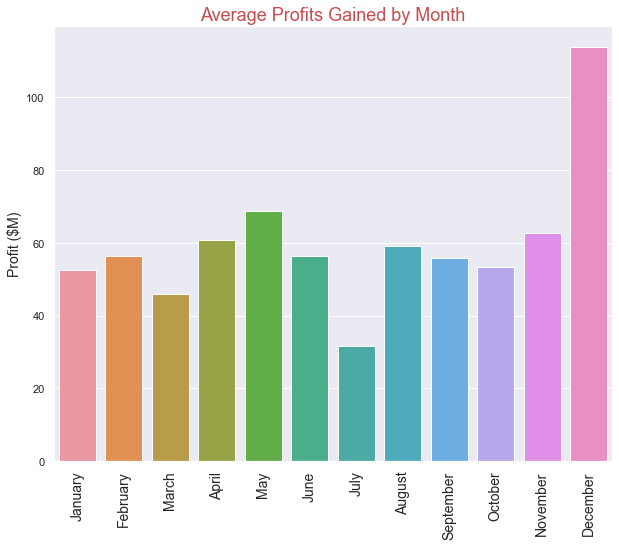

In [154]:
#plot our data
fig = plt.figure(figsize = (10,8))

profit_by_month_bar = sns.barplot(x = profit_by_month.index, y = profit_by_month['profit'], 
                                  data = profit_by_month)

profit_by_month_bar.axes.set_title('Average Profits Gained by Month', color="r", fontsize = 18)

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
              'October', 'November', 'December']

#rotate the x-axis text and change to month name 
profit_by_month_bar.set_xticklabels(month_list, rotation = 90, size = 14)
plt.ylabel("Profit ($M)", size=14)
#Save file
fig.savefig('./images/profit_month.png');

 This bar graph shows average profits gained to be the highest in December at 114 million dollars.  May is the second best month to release a movie where average profits gained are 68 million dollars.  I recommend to release movies in December to maximize profits.

### Do higher production budgets lead to higher profits?

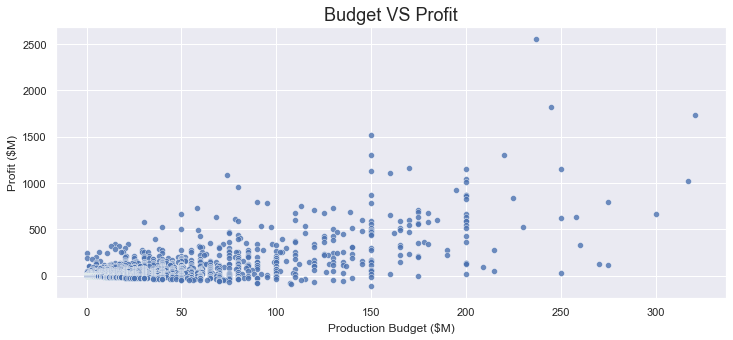

Correlation between budget and profit :  0.6831794310650985


In [155]:
# Plot
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot(x = 'budget', y = 'profit', alpha = 0.8, data = df);


plt.title("Budget VS Profit", fontsize=18)
plt.ylabel("Profit ($M)", fontsize=12)
plt.xlabel("Production Budget ($M)", fontsize=12)
plt.show()

# Calculate correlation
data_corr = df.corr()
print("Correlation between budget and profit : ",data_corr.loc['budget','profit'])
#Save image
fig.savefig('./images/budget_profit.png')

There is a moderate positive relationship between the 2 variables, budget and profit.  Higher budget films could get higher profit, but there is some risk involved.

### Do higher production budgets lead to higher user ratings?

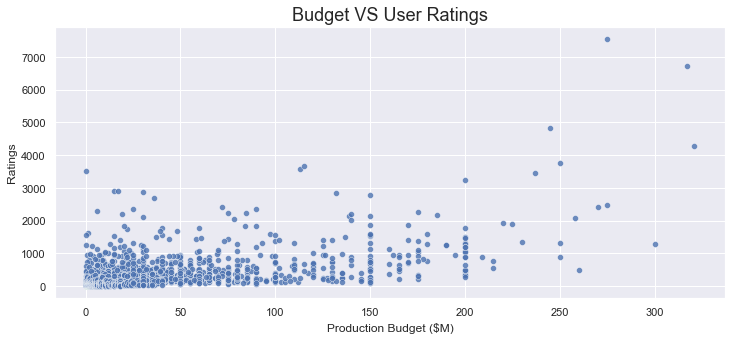

Correlation between budget and user ratings:  0.5769770887373915


In [156]:
# Plot
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot(x = 'budget', y = 'reviews_from_users', alpha = 0.8, data = df);


plt.title("Budget VS User Ratings", fontsize=18)
plt.ylabel("Ratings", fontsize=12)
plt.xlabel("Production Budget ($M)", fontsize=12)
plt.show()

# Calculate correlation
data_corr = df.corr()
print("Correlation between budget and user ratings: ",data_corr.loc['budget','reviews_from_users'])
#Save image
fig.savefig('images/budget_user_ratings.png')

### Do higher production budgets lead to higher critic reviews?

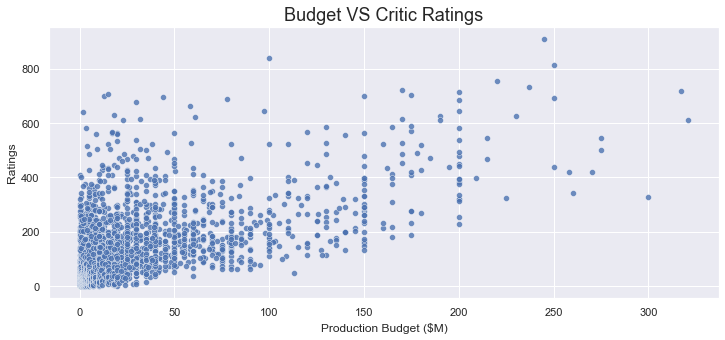

Correlation between budget and critic ratings:  0.5924910897506448


In [157]:
# Plot
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot(x = 'budget', y = 'reviews_from_critics', alpha = 0.8, data = df);


plt.title("Budget VS Critic Ratings", fontsize=18)
plt.ylabel("Ratings", fontsize=12)
plt.xlabel("Production Budget ($M)", fontsize=12)
plt.show()

# Calculate correlation
data_corr = df.corr()
print("Correlation between budget and critic ratings: ",data_corr.loc['budget','reviews_from_critics'])
#Save image
fig.savefig('./images/budget_critic_ratings.png')

### Do higher production budgets lead to higher ROI?

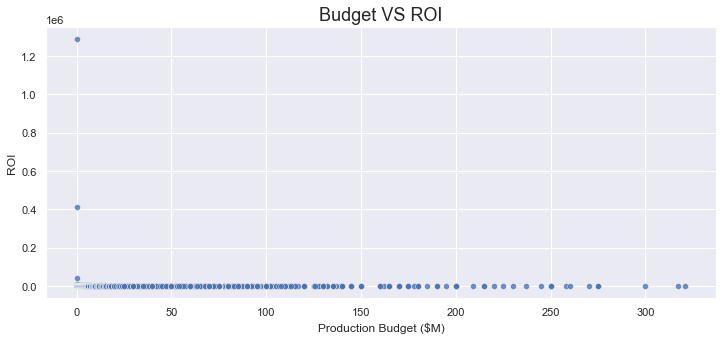

Correlation between budget and ROI:  -0.017770406108213288


In [158]:
# Plot
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot(x = 'budget', y = 'roi', alpha = 0.8, data = df);


plt.title("Budget VS ROI", fontsize=18)
plt.ylabel("ROI", fontsize=12)
plt.xlabel("Production Budget ($M)", fontsize=12)
plt.show()

# Calculate correlation
data_corr = df.corr()
print("Correlation between budget and ROI: ",data_corr.loc['budget','roi'])
#Save image
fig.savefig('./images/budget_roi.png')

The relationship between user and critic reviews and production budget have a moderate positive relationship as well.  There is no relationship between budget and ROI.  High budget films may lead to more profits and higher user and critic reviews.

### What is the most profitable genre?

In [159]:
# split the genres  from combined value into single genre value 
df_split = df.assign(genre = df['genre'].str.split(',')).explode('genre')
df_split.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year
42868,Avatar,2010-01-15,Action,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
42868,Avatar,2010-01-15,Adventure,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
42868,Avatar,2010-01-15,Fantasy,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
58600,Star Wars - Il risveglio della Forza,2015-12-16,Action,138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015
58600,Star Wars - Il risveglio della Forza,2015-12-16,Adventure,138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015


In [160]:
#Remove white space from genres
df_split['genre'] = df_split['genre'].str.strip()

In [161]:
#Calculate profit of each genre
mean_profit_vs_genre_df = df_split.groupby('genre').profit.mean().sort_values(ascending=False).reset_index().head(8)
mean_profit_vs_genre_df

,genre,profit
0,Animation,256.862373
1,Adventure,244.556871
2,Sci-Fi,198.652085
3,Fantasy,129.115074
4,Action,125.677625
5,Family,68.228574
6,Comedy,58.625213
7,Musical,56.523931


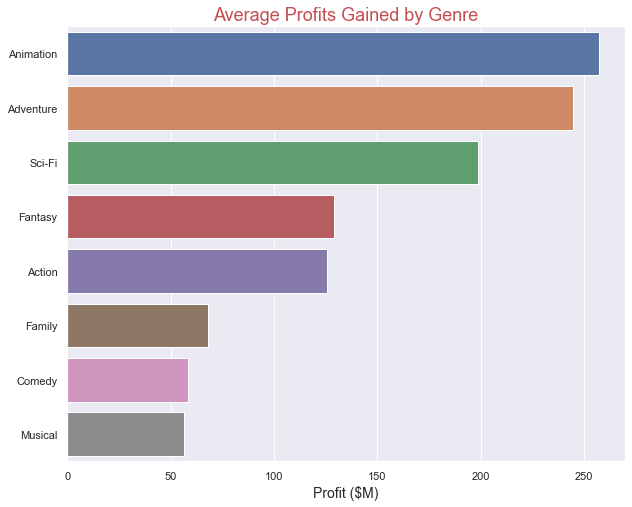

In [162]:
#plot
fig = plt.figure(figsize = (10,8))

profit_by_genre_bar = sns.barplot(x = mean_profit_vs_genre_df['profit'], y = mean_profit_vs_genre_df['genre'], 
                                  data = mean_profit_vs_genre_df)

profit_by_genre_bar.axes.set_title('Average Profits Gained by Genre', color="r", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("Profit ($M)", size=14)
#Save image
fig.savefig('./images/genre_profit.png');

The top 5 most profitable genres of movies are Animation, Adventure, Sci-Fi, Fantasy, and Action.

### What genre is rated highest by users?

In [163]:
#Calculate user ratings of each genre
mean_ratings_vs_genre_df = df_split.groupby('genre').reviews_from_users.mean().sort_values(ascending=False) \
                           .reset_index().head(8)
mean_ratings_vs_genre_df    

,genre,reviews_from_users
0,Sci-Fi,809.253425
1,Adventure,633.768786
2,Fantasy,542.818182
3,Action,520.197154
4,Mystery,347.565217
5,Animation,319.485507
6,Horror,291.622137
7,Thriller,269.457286


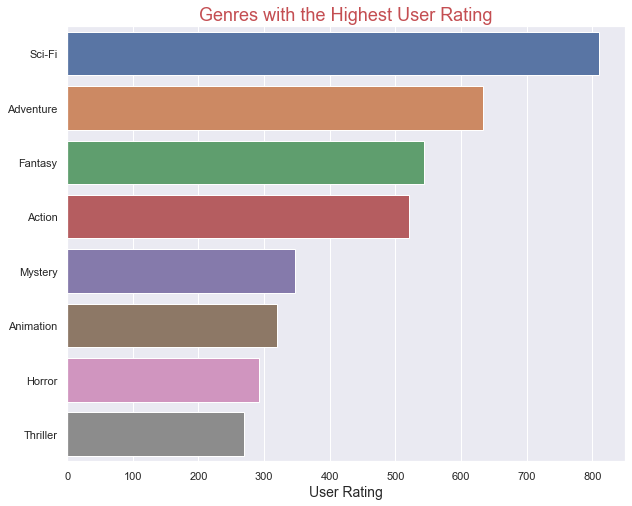

In [164]:
#plot
fig = plt.figure(figsize = (10,8))

rating_by_user_bar = sns.barplot(x = mean_ratings_vs_genre_df['reviews_from_users'],
                                  y = mean_ratings_vs_genre_df['genre'], 
                                  data = mean_ratings_vs_genre_df)

rating_by_user_bar.axes.set_title('Genres with the Highest User Rating', color="r", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("User Rating", size=14)

#Save image
fig.savefig('./images/genre_user_ratings.png');

### What genre is rated highest by critics?

In [165]:
#Calculate user ratings of each genre
mean_c_ratings_vs_genre_df = df_split.groupby('genre').reviews_from_critics.mean().sort_values(ascending=False) \
                           .reset_index().head(8)
mean_c_ratings_vs_genre_df

,genre,reviews_from_critics
0,Sci-Fi,265.527397
1,Adventure,248.283237
2,Action,206.361789
3,Animation,193.920290
4,Fantasy,193.720280
5,Mystery,159.579710
6,Biography,155.363636
7,Horror,140.980916


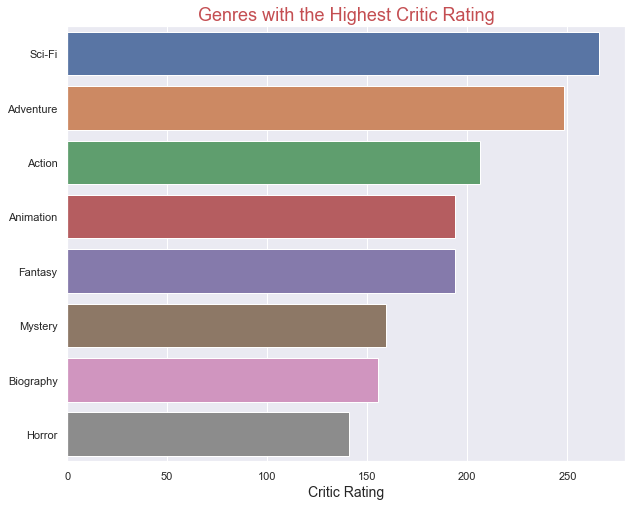

In [166]:
#plot
fig = plt.figure(figsize = (10,8))

rating_by_critic_bar = sns.barplot(x = mean_c_ratings_vs_genre_df['reviews_from_critics'],
                                  y = mean_c_ratings_vs_genre_df['genre'], 
                                  data = mean_c_ratings_vs_genre_df)

rating_by_critic_bar.axes.set_title('Genres with the Highest Critic Rating', color="r", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("Critic Rating", size=14)

#Save image
fig.savefig('./images/genre_critic_ratings.png');

Our most profitable genres typically get higher user and critic reviews as well.  Sci-Fi gets the highest overall ratings with Adventure second.  Animation generally does not get high ratings from users or critics. Let's take a look a closer look at our top genres.

### What is our top overall genre?

In [167]:
# Keep top 5 genres from ratings and profits
top_genre_df = df_split[(df_split['genre'] == 'Sci-Fi') | (df_split['genre'] == 'Adventure') |
                           (df_split['genre'] == 'Animation') | (df_split['genre'] == 'Action') |
                           (df_split['genre'] == 'Fantasy')]
top_genre_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year
42868,Avatar,2010-01-15,Action,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
42868,Avatar,2010-01-15,Adventure,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
42868,Avatar,2010-01-15,Fantasy,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
58600,Star Wars - Il risveglio della Forza,2015-12-16,Action,138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015
58600,Star Wars - Il risveglio della Forza,2015-12-16,Adventure,138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015


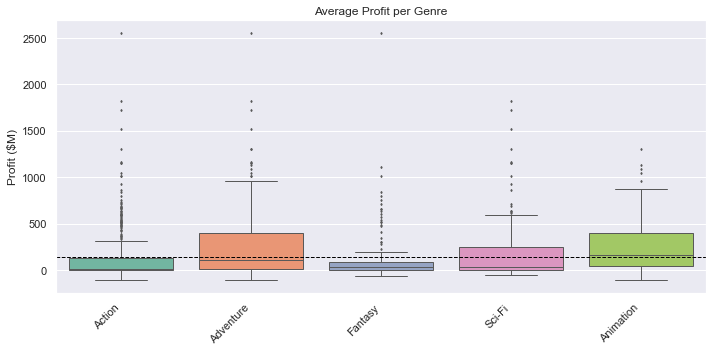

In [168]:
# Boxplot
fig = plt.figure(figsize = (10, 5))

g = sns.boxplot(x = 'genre', y = 'profit', data = top_genre_df, 
                palette="Set2", linewidth = 1, fliersize= 1.5)

g.set(title = 'Average Profit per Genre', 
      ylabel = "Profit ($M)", xlabel = "")

# Horizontal line on overall mean (all genres)
plt.axhline(mean_profit_vs_genre_df.profit.mean(), ls='--', lw = 1, color = 'black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#Save image
fig.savefig('./images/genre_profit_box.png')

In the boxplot above, we can see the overall mean, which includes data from all genres represented by the black hyphen line.  The 3 genres that generate average profits higher than the mean are Animation, Adventure and Sci-Fi.  There are also several outliers in the Adventure and Sci-Fi genre that skew the mean higher as some films generated massive profits. Animation has a tighter range of profit generated, and most is higher than the mean of overall genre profit.

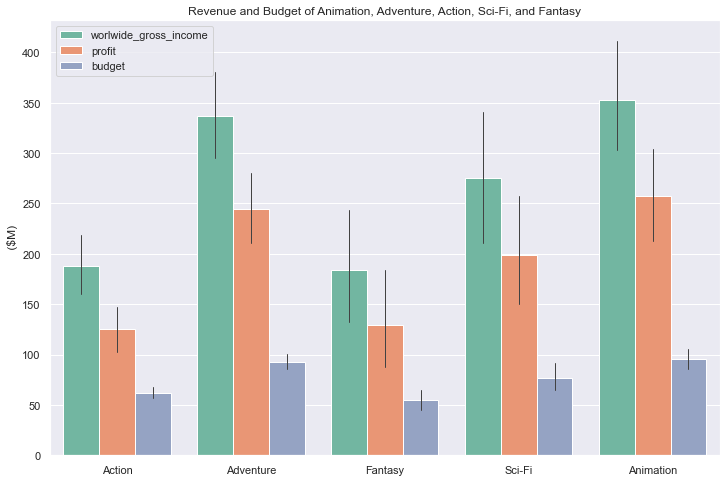

In [169]:
# Make table with with values and columns
table = pd.melt(top_genre_df, id_vars=['genre'],
              value_vars=['worlwide_gross_income', 'profit', 'budget'])
# Plot
fig = plt.figure(figsize = (12,8))

g = sns.barplot(x="genre", y="value", hue="variable", data=table, 
                errwidth = 1, palette="Set2")

g.set(title = "Revenue and Budget of Animation, Adventure, Action, Sci-Fi, and Fantasy", 
      ylabel = " ($M)", xlabel = "")
plt.legend(title = "")
plt.show()
#Save image
fig.savefig('./images/genre_profit_budget_income.png')

In the figure above, we can see that Animation has the highest gross income, profit, and production budget. Adventure has the second highest of all categories.  This is the positive correlation between production budget and profit that was illustrated in the scatter plots above.  

### What director generates the most average profit?

Let's start by removing directors who have directed less than 5 films.  This will give us a better overall representation.

In [170]:
# split the directors from combined value into single director value 
director_df = df.assign(director = df['director'].str.split(',')).explode('director')
director_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321.0,2048.359754,4273.0,611.0,1727.359754,538.118303,4,2018
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,Joe Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321.0,2048.359754,4273.0,611.0,1727.359754,538.118303,4,2018
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150.0,1670.401444,1537.0,698.0,1520.401444,1013.600963,6,2015


In [171]:
# Dictionary of directors and numbers of rows(# of movies)
dir_name_counts = director_df['director'].value_counts().to_dict()

In [172]:
# Dictionary of actors and numbers of rows(# of movies)
name_counts = director_df['director'].value_counts().to_dict()

In [173]:
# Director film counts
director_df['film_count'] = director_df['director'].map(name_counts)
director_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year,film_count
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,1
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015,4
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321.0,2048.359754,4273.0,611.0,1727.359754,538.118303,4,2018,3
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,Joe Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321.0,2048.359754,4273.0,611.0,1727.359754,538.118303,4,2018,3
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150.0,1670.401444,1537.0,698.0,1520.401444,1013.600963,6,2015,3


In [174]:
# Make new dataframe for popular directors
director_df = director_df[director_df['film_count'] >= 5]

In [175]:
# Top 10 most profitable directors
top_dir_df = director_df.groupby('director').profit.mean().sort_values(ascending=False).reset_index().head(10)
top_dir_df

,director,profit
0,Gore Verbinski,395.669314
1,Michael Bay,382.231824
2,Sam Raimi,321.688511
3,Roland Emmerich,257.139748
4,Mike Mitchell,240.893867
5,Jay Roach,195.960853
6,Robert Zemeckis,166.204303
7,James Mangold,154.461202
8,Jon Favreau,130.118582
9,Dennis Dugan,116.067301


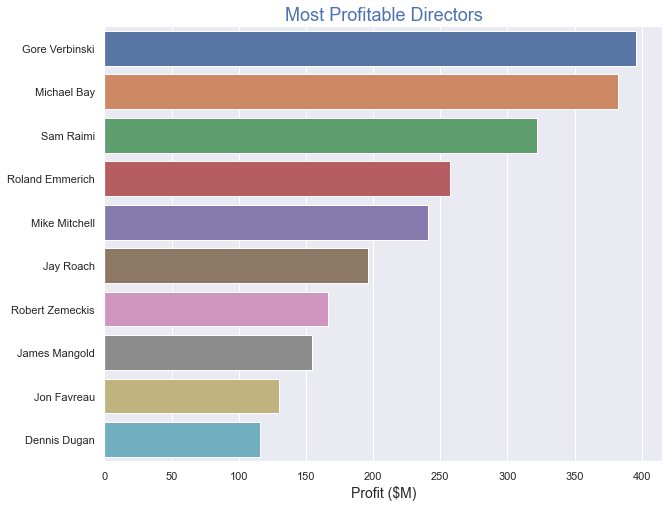

In [176]:
#plot
fig = plt.figure(figsize = (10,8))

top_dir_bar = sns.barplot(x = top_dir_df['profit'],
                                  y = top_dir_df['director'], 
                                  data = top_dir_df)

top_dir_bar.axes.set_title('Most Profitable Directors', color="b", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("Profit ($M)", size=14)
#Save image
fig.savefig('./images/director_profit.png');

Gore Verbinski, Michael Bay, and San Raimi have generated the highest average profits over the last 20 years.

### What directors have the highest average user ratings?

In [177]:
# Top 10 directors based on average user reviews
top_dir_user_df = director_df.groupby('director').reviews_from_users.mean().sort_values(ascending=False) \
                  .reset_index().head(10)
top_dir_user_df

,director,reviews_from_users
0,Gore Verbinski,1371.000000
1,Michael Bay,1170.285714
2,Sam Raimi,1081.857143
3,Paul Thomas Anderson,920.800000
4,Roland Emmerich,770.200000
5,James Mangold,746.400000
6,David Ayer,605.000000
7,Robert Zemeckis,587.000000
8,Antoine Fuqua,545.000000
9,Clint Eastwood,461.285714


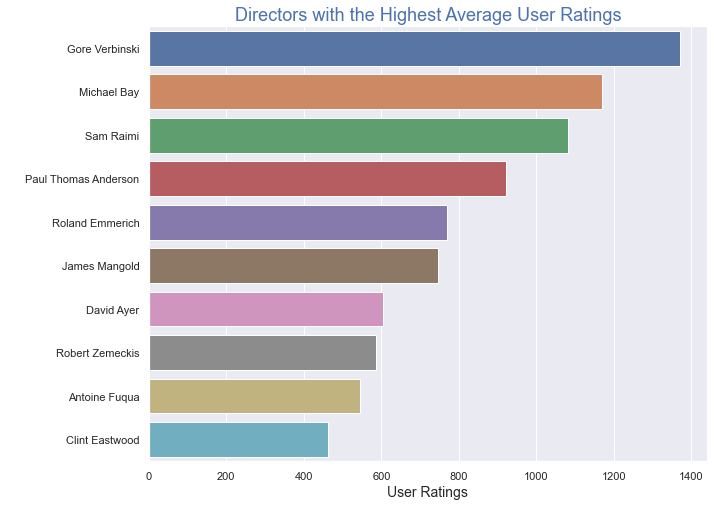

In [178]:
#plot
fig = plt.figure(figsize = (10,8))

top_dir_bar = sns.barplot(x = top_dir_user_df['reviews_from_users'],
                                  y = top_dir_user_df['director'], 
                                  data = top_dir_user_df)

top_dir_bar.axes.set_title('Directors with the Highest Average User Ratings', color="b", fontsize = 18)

#title
plt.ylabel(" ", size=14)
plt.xlabel("User Ratings", size=14)
#Save image
fig.savefig('./images/director_user_ratings.png');

### What directors have the highest average critic reviews?

In [179]:
#Top 10 directors based on critic reviews
top_dir_cri_df = director_df.groupby('director').reviews_from_critics.mean().sort_values(ascending=False) \
                .reset_index().head(10)
top_dir_cri_df

,director,reviews_from_critics
0,Paul Thomas Anderson,354.200000
1,Gore Verbinski,343.166667
2,Sam Raimi,325.142857
3,Clint Eastwood,318.714286
4,Michael Bay,305.142857
5,James Mangold,299.000000
6,David Ayer,281.166667
7,Jason Reitman,276.800000
8,Adam McKay,259.333333
9,Roland Emmerich,256.800000


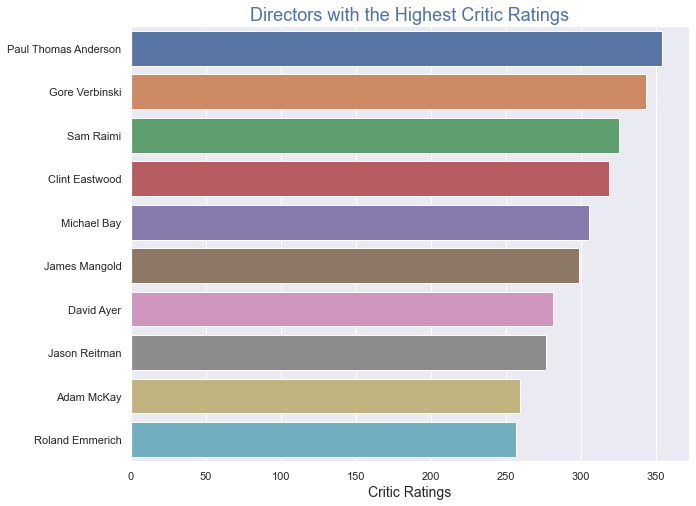

In [180]:
#plot
fig = plt.figure(figsize = (10,8))

top_dir_bar = sns.barplot(x = top_dir_cri_df['reviews_from_critics'],
                                  y = top_dir_cri_df['director'], 
                                  data = top_dir_cri_df)

top_dir_bar.axes.set_title('Directors with the Highest Critic Ratings', color="b", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("Critic Ratings", size=14)
#Save image
fig.savefig('./images/director_critic_ratings.png');

The most profitable directors are also the directors with the highest user and critic ratings.  Michael Bay slipped out of the top 3 by critic reviews.  Therefore, the top directors by profit and ratings are Gore Verbinski and Sam Raimi.  Paul Thomas Anderson and Clint Eastwood are good choices of director if looking to make critically acclaimed films.

### What directors have the highest average ROI?

In [181]:
# Top 10 popular directors calculated by ROI
dir_roi_df = director_df.groupby('director').roi.mean().sort_values(ascending=False).reset_index().head(10)
dir_roi_df

,director,roi
0,Anne Fletcher,407.745964
1,Robert Luketic,363.886779
2,Tim Story,316.687213
3,Steven Soderbergh,308.121412
4,Mike Mitchell,296.802003
5,Jay Roach,292.353659
6,Andy Fickman,266.769000
7,Todd Phillips,257.083190
8,Michael Bay,251.977852
9,Tyler Perry,250.821036


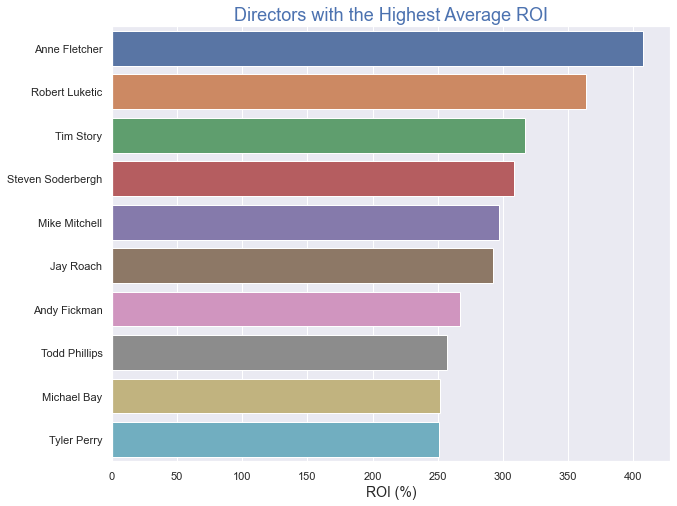

In [182]:
#plot
fig = plt.figure(figsize = (10,8))

dir_roi_bar = sns.barplot(x = dir_roi_df['roi'],
                                  y = dir_roi_df['director'], 
                                  data = dir_roi_df)

dir_roi_bar.axes.set_title('Directors with the Highest Average ROI', color="b", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("ROI (%)", size=14)
#Save image
fig.savefig('./images/director_roi.png');

Anne Fletcher, Robert Luketic, and Tim Story are less known directors who have shown to have tremendous potential based on their ROI.

### What actor appears the most frequently in profitable movies?

In [183]:
# The mean of my profit is $58 million
df['profit'].describe()

count    2427.000000
mean       58.178682
std       164.015347
min      -110.766322
25%        -3.111568
50%         0.835752
75%        48.985150
max      2553.439092
Name: profit, dtype: float64

In [184]:
### Make new df with movies that made > $58 million dollors profit
profit_df = df[df['profit'] >= 58]
profit_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245.0,2068.224036,4822.0,909.0,1823.224036,744.173076,12,2015
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321.0,2048.359754,4273.0,611.0,1727.359754,538.118303,4,2018
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150.0,1670.401444,1537.0,698.0,1520.401444,1013.600963,6,2015
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150.0,1450.026933,1302.0,275.0,1300.026933,866.684622,11,2019


In [185]:
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 42868 to 42823
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  549 non-null    object        
 1   date_published         549 non-null    datetime64[ns]
 2   genre                  549 non-null    object        
 3   duration               549 non-null    int64         
 4   director               549 non-null    object        
 5   writer                 549 non-null    object        
 6   actors                 549 non-null    object        
 7   avg_vote               549 non-null    float64       
 8   votes                  549 non-null    int64         
 9   budget                 549 non-null    float64       
 10  worlwide_gross_income  549 non-null    float64       
 11  reviews_from_users     549 non-null    float64       
 12  reviews_from_critics   549 non-null    float64       
 13 

In [186]:
# Remove whitespace and split actors
df['actors'] = df['actors'].str.split(',')

In [187]:
# Create list for every actor appearance in profitable movies
list1 = []
for actor in df['actors']:
    list1.extend(actor)
  

In [188]:
# Create dataframe from the list of actor appearances and sort by number of appearances
actor_counts = pd.Series(list1).value_counts().sort_values(ascending=False).head(10)
actor_counts

 J.K. Simmons         25
 Richard Jenkins      25
Adam Sandler          23
 Alec Baldwin         22
 David Koechner       21
 Judy Greer           21
 Samuel L. Jackson    20
 Steve Buscemi        19
 Marisa Tomei         18
 Woody Harrelson      18
dtype: int64

### What actors make the most profitable movies?

In [189]:
# split the actors from combined value into single actor value 
actor_df = df.assign(actor = df['actors'].str.split(',')).explode('actors')
actor_df.head()
    

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year,actor
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Sam Worthington,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Zoe Saldana,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Sigourney Weaver,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Stephen Lang,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Michelle Rodriguez,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN


In [190]:
#Strip whitespace
actor_df['actors'] = actor_df['actors'].str.strip()

In [191]:
# Dictionary of actors and numbers of rows(# of movies)
name_counts = actor_df['actors'].value_counts().to_dict()

In [192]:
# Actor film count
actor_df['film_count'] = actor_df['actors'].map(name_counts)

In [193]:
# Check new column film_count
actor_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,release_year,actor,film_count
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Sam Worthington,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN,4
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Zoe Saldana,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN,16
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Sigourney Weaver,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN,9
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Stephen Lang,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN,7
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Michelle Rodriguez,7.8,1101160,237.0,2790.439092,3442.0,733.0,2553.439092,1077.400461,1,2010,NaN,5


In [194]:
# Keep actors that have been in more than 10 movies
top_actor_df = actor_df[actor_df['film_count'] >= 10]

In [195]:
# Calculate total profits per popular actor
actor_profit_df = top_actor_df.groupby('actors').profit.mean().sort_values(ascending=False).reset_index().head(10)
actor_profit_df

,actors,profit
0,Paul Bettany,539.694295
1,Josh Gad,460.054026
2,Alan Tudyk,430.811053
3,Don Cheadle,426.758770
4,Robert Downey Jr.,410.954109
5,Chris Hemsworth,408.083811
6,Zoe Saldana,378.375434
7,Gwyneth Paltrow,359.557037
8,Bonnie Hunt,351.025300
9,Scarlett Johansson,346.895738


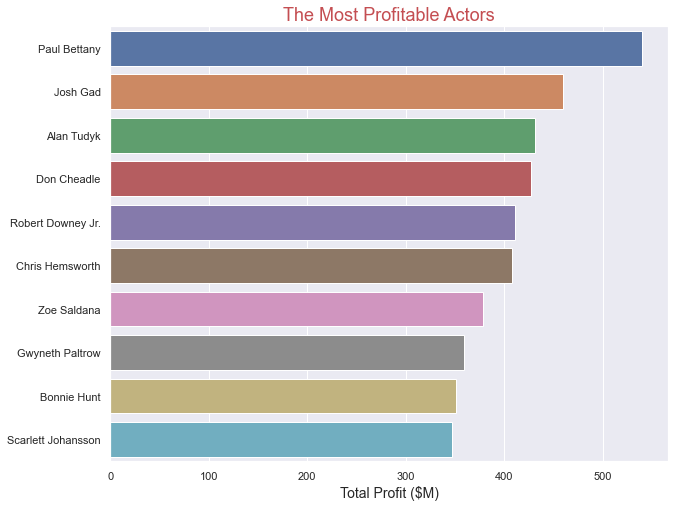

In [196]:
#plot
fig = plt.figure(figsize = (10,8))

actor_profit_bar = sns.barplot(x = actor_profit_df['profit'],
                                  y = actor_profit_df['actors'], 
                                  data = actor_profit_df)

actor_profit_bar.axes.set_title('The Most Profitable Actors', color="r", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("Total Profit ($M)", size=14)
#Save image
fig.savefig('./images/actor_profit.png');

Paul Bettany, Josh Gad, Alan Tudyk, Don Cheadle, Robert Downey Jr, and Chris Hemsworth generate the highest average profit per movie that they make, most likely due to the high grossing Avengers and Frozen movies.  

### What actors have the highest average user ratings?

In [197]:
# Calculate average per popular actor
actor_rating_df = top_actor_df.groupby('actors').reviews_from_users.mean().sort_values(ascending=False).reset_index().head(10)
actor_rating_df

,actors,reviews_from_users
0,Paul Bettany,1311.818182
1,Ewan McGregor,1261.400000
2,Natalie Portman,1111.400000
3,Chris Hemsworth,1036.357143
4,Mark Ruffalo,895.263158
5,Don Cheadle,882.818182
6,Robert Downey Jr.,875.125000
7,Zoe Saldana,864.375000
8,Scarlett Johansson,862.562500
9,Laurence Fishburne,858.846154


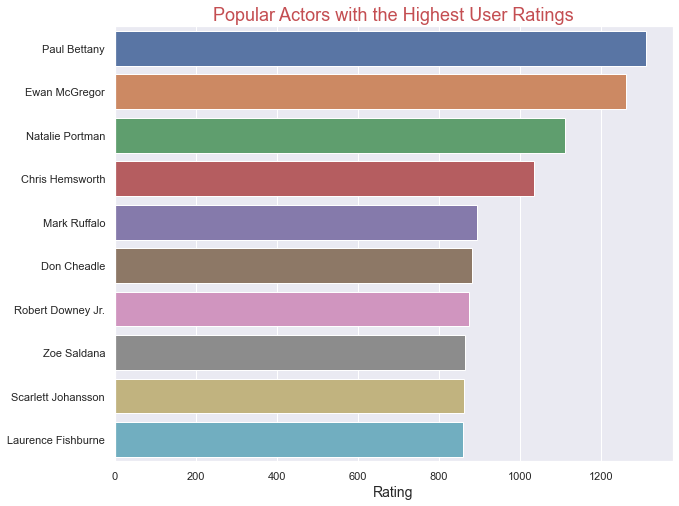

In [198]:
#plot
fig = plt.figure(figsize = (10,8))

actor_rating_bar = sns.barplot(x = actor_rating_df['reviews_from_users'],
                                  y = actor_rating_df['actors'], 
                                  data = actor_rating_df)

actor_rating_bar.axes.set_title('Popular Actors with the Highest User Ratings', 
                                color="r", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("Rating", size=14)
#Save image
fig.savefig('./images/actor_user_ratings.png');

### What actors have the highest average critic ratings?

In [199]:
# Calculate average per popular actor
actor_c_rating_df = top_actor_df.groupby('actors').reviews_from_critics.mean().sort_values(ascending=False).reset_index().head(10)
actor_c_rating_df

,actors,reviews_from_critics
0,Paul Bettany,437.272727
1,Chris Hemsworth,407.928571
2,Scarlett Johansson,371.437500
3,Robert Downey Jr.,366.812500
4,Idris Elba,362.727273
5,Gwyneth Paltrow,341.800000
6,Natalie Portman,330.700000
7,Josh Brolin,324.700000
8,Mila Kunis,324.100000
9,Don Cheadle,323.454545


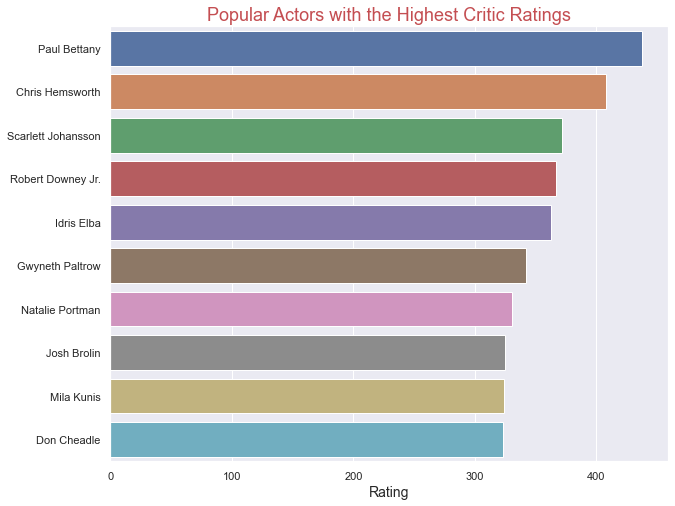

In [200]:
#plot
fig = plt.figure(figsize = (10,8))

actor_c_rating_bar = sns.barplot(x = actor_c_rating_df['reviews_from_critics'],
                                  y = actor_c_rating_df['actors'], 
                                  data = actor_c_rating_df)

actor_c_rating_bar.axes.set_title('Popular Actors with the Highest Critic Ratings', 
                                  color="r", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("Rating", size=14)
# Save image
fig.savefig('./images/actor_critic_ratings.png');

Paul Bettany, Robert Downy Jr., and Chris Hemsworth are also in our top 5 highest rated actors.

### What popular actors have the highest average ROI?

In [201]:
# Top 10 popular actor with highest average ROI
actor_roi_df = top_actor_df.groupby('actors').roi.mean().sort_values(ascending=False).reset_index().head(10)
actor_roi_df

,actors,roi
0,Diedrich Bader,1238.957052
1,Danny Glover,860.936749
2,Marlon Wayans,552.732149
3,Mila Kunis,526.103067
4,Zac Efron,496.314757
5,Allison Janney,455.127700
6,Mike Vogel,436.985952
7,Alfre Woodard,429.304772
8,Channing Tatum,412.034534
9,Natalie Portman,406.412683


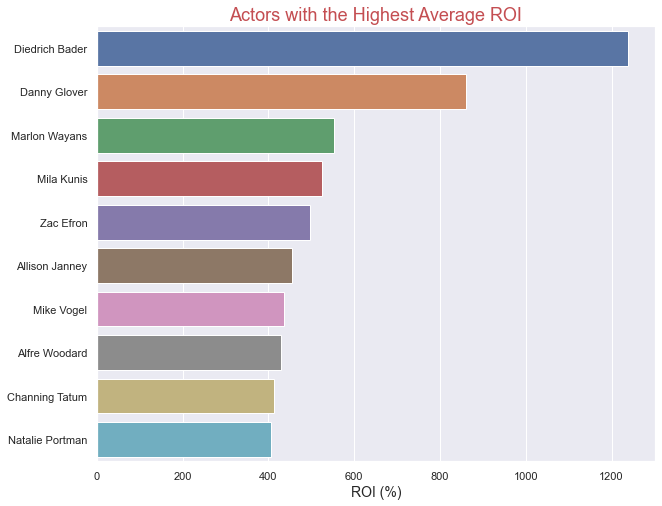

In [202]:
#plot
fig = plt.figure(figsize = (10,8))

actor_roi_bar = sns.barplot(x = actor_roi_df['roi'],
                                  y = actor_roi_df['actors'], 
                                  data = actor_roi_df)

actor_roi_bar.axes.set_title('Actors with the Highest Average ROI',
                             color="r", fontsize = 18)

#title
plt.ylabel("", size=14)
plt.xlabel("ROI (%)", size=14)
# Save image
fig.savefig('./images/actor_roi.png');

Paul Bettany is at the top of every list for profit, user and critic ratings, so he is our actor most likely to generate high profit and ratings. Robert Downy Jr was also high ranked on profit and critic ratings list, so he is therefore our second highest overall actor, followed by Chris Hemsworth.  Natalie Portman and Gwyneth Paltrow are the actors with highest critic reviews not appearing in the Avengers and Frozen movies, so they are top actors if interested in creating critically acclaimed films. Diedrich Bader and Danny Glover have the highest actor ROI.

## Evaluation
We have performed a thorough analysis on the factors and characteristics that make a movie successful.  I will propose some recommendations and guidelines in the following sections to start a movie studio based on the analysis of movies that have been successful since the year 2000. Limiting our dataset to movies released from the year 2000 to present gives us a better idea of what characteristics of movies are making them successful now and over time. 

Based on the exploration and analysis of the IMDB movies dataset:

1) The following are characteristics and properties of movies that lead to higher profits, audience, and critic reviews:
  * Movie length between 152 - 165 minutes.
  * A high production budget.
  * Movie released in December

2) The best overall movie genres to create today are Animation and Adventure. Both Animation and Adventure have higher production budgets, but also higher profits and gross income than other genres.  Animation is the most profitable genre, but typically not in the top of user and critic reviews.  Animation has a tighter range of profit generated, and most is higher than the mean of overall genre profit.  There are also few outliers in the Animation category. Adventure is the second most profitable genre but there are far more outliers in the data, meaning there are several Adventure films that generated massive profits that drive the mean up.  Adventure movies are generally rated higher by the audience and critics.

3) The following are people that have been the most successful at acting and directing films in the past 20 years:
  * Directors - The top directors by profit and ratings are Gore Verbinski and Sam Raimi. Paul Thomas Anderson and Clint Eastwood scores high with the critics. Anne Fletcher, Robert Luketic, and Tim Story are less known directors who have shown to have tremendous potential based on their ROI.
  * Actors - Paul Bettany is the top overall actor of every success category, followed by Robert Downy Jr and Chris Hemsworth. Josh Gad and Alan Tudyk are highly profitable due to their appearance in several Disney movies, but those profits did not translate to user and critic ratings. Natalie Portman and Gwyneth Paltrow are the actors with highest critic reviews not appearing in the Avengers and Frozen movies, while still scoring high with the critics. Diedrich Bader and Danny Glover have the highest ROI.

## Conclusions
We have determined some of the properties and characteristics that make a movie successful recently. I will propose some recommendations and guidelines to start a movie studio based on the work of this project as follows: 

1) The studio should create high budget films that are 152 - 165 minutes long and release these films in December.

2) The studio should focus on creating Animation and Adventure films. Animation is a good choice if a less risky investment is preferred, as higher profits are seen with less outliers in the data (Movies that generated huge profits). If developing a global presence while maintaining high profits is preferred, I recommend creating Adventure films. There is more risk involved in making Adventure films, but there is also the potential to make huge profits and produce critically acclaimed films.

3) The studio should look at the results of the director and actor analysis and hire a director and actors based on the end goal of the film.
  * Directors - The top directors by profit and ratings are Gore Verbinski and Sam Raimi. Paul Thomas Anderson and Clint           Eastwood are good choices for director if looking to make critically acclaimed films. Anne Fletcher and Robert Luketic,       known for "chick flicks" are top choices if looking for a director to provide high ROI.
  * Actors - Paul Bettany is the top overall actor of every success category, followed by Robert Downy Jr and Chris Hemsworth.     Natalie Portman and Gwyneth Paltrow should be hired if interested in making critically acclaimed films.  Diedrich Bader       and Danny Glover are good choices for actors who provide high ROI.


Determining top directors and actors by genre would be an interesting extension to this project.  Doing so is beyond the scope of this project. This was a small sample of movies that were selected based on the new movie studio's current situation.  There are thousands upon thousands more films that could be analyzed to give us a true global picture of what makes movies successful.  We are also evolving to a new world where streaming services are the new box office.  We would have to come up with an effective way to quantify the profits each individual movie released through streaming services generates.  This would be an interesting followup project when more data is available.